# Pigment and Indices - Correlation & Linear Models
- *Objectives:*
    - Get correlogram of pigment concentration and spectral indices
    - Visualize linear models
    - Export CSV of both data sources 'merged'
    - Plots

In [1]:
import os
import glob
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figures and plot settings
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.rcParams['figure.dpi'] = 300

## Path and load data

In [2]:
PATH = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results")

In [4]:
# Pigment dataframe
pigment_df = pd.read_csv(PATH / "pigment-mg-mm.csv", index_col=0)
pigment_df.rename({'CE01A':'CE01'}, axis=1, inplace=True)
pigment_df

,CE01,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE_area,0.000909,0.000000,0.017853,0.017771,0.000000,0.001520,0.057717,0.045491,0.101076,0.097760,0.089318,0.122032,0.046043,0.075838
PC_area,0.000000,0.002459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000366,0.000665,0.000233,0.000115,0.000000,0.000000,0.000000
Chl_area,13.783949,2.663248,11.070192,14.734987,14.647744,48.507791,5.798262,4.569254,5.693215,7.298990,6.619045,9.067947,23.059809,8.166550
S_PC_area,0.016037,0.000000,0.006882,0.021141,0.007961,0.022082,0.013213,0.005559,0.012542,0.011292,0.012283,0.010073,0.003001,0.008366
S_PE_area,0.020251,0.000000,0.050721,0.060838,0.010205,0.058210,0.074723,0.053939,0.119704,0.118084,0.111563,0.142148,0.055653,0.096086
IO_PC_area,0.057203,0.000007,0.000031,0.000312,0.000053,0.000343,0.003625,0.000017,0.000195,0.000166,0.000091,0.000371,0.000099,0.000305
IO_APC_area,0.483631,0.000000,0.001151,0.016502,0.009188,0.024106,0.051665,0.001742,0.006743,0.005528,0.004438,0.009893,0.009533,0.010136
IO_PE_area,0.277494,0.000000,0.044593,0.057622,0.016307,0.067537,0.088544,0.044543,0.102286,0.101671,0.094994,0.122275,0.052191,0.086401


In [5]:
spectral_indices = pd.read_csv(PATH / "spectral-indices.csv", index_col=0)
spectral_indices.tail()

,CE01,CE01B,CE02,CE03,CE03B,CE04,CE05,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
dd434,0.000210,0.000177,0.000138,0.000118,0.000110,0.000162,0.000291,0.000231,0.000228,0.000187,0.000084,0.000305,0.000192,0.000149,0.000297
dd494,0.000455,0.000307,0.000454,0.000288,-0.000013,0.000365,0.000619,0.000559,0.000372,0.000557,0.000550,0.000778,0.000456,0.000493,0.000626
dd563,0.000339,0.000200,0.000498,0.000382,-0.000059,0.000376,0.000651,0.000470,0.000289,0.000503,0.000617,0.000736,0.000370,0.000413,0.000590
dd624,0.000039,0.000030,0.000091,0.000013,-0.000029,0.000111,0.000176,0.000351,0.000247,0.000312,0.000297,0.000339,0.000280,0.000293,0.000305
dd665,0.000734,0.000750,0.000995,0.000712,0.000700,0.000906,0.000914,0.001006,0.000899,0.000871,0.000845,0.001045,0.000821,0.000812,0.000931


In [6]:
pigment_df

,CE01,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE_area,0.000909,0.000000,0.017853,0.017771,0.000000,0.001520,0.057717,0.045491,0.101076,0.097760,0.089318,0.122032,0.046043,0.075838
PC_area,0.000000,0.002459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000366,0.000665,0.000233,0.000115,0.000000,0.000000,0.000000
Chl_area,13.783949,2.663248,11.070192,14.734987,14.647744,48.507791,5.798262,4.569254,5.693215,7.298990,6.619045,9.067947,23.059809,8.166550
S_PC_area,0.016037,0.000000,0.006882,0.021141,0.007961,0.022082,0.013213,0.005559,0.012542,0.011292,0.012283,0.010073,0.003001,0.008366
S_PE_area,0.020251,0.000000,0.050721,0.060838,0.010205,0.058210,0.074723,0.053939,0.119704,0.118084,0.111563,0.142148,0.055653,0.096086
IO_PC_area,0.057203,0.000007,0.000031,0.000312,0.000053,0.000343,0.003625,0.000017,0.000195,0.000166,0.000091,0.000371,0.000099,0.000305
IO_APC_area,0.483631,0.000000,0.001151,0.016502,0.009188,0.024106,0.051665,0.001742,0.006743,0.005528,0.004438,0.009893,0.009533,0.010136
IO_PE_area,0.277494,0.000000,0.044593,0.057622,0.016307,0.067537,0.088544,0.044543,0.102286,0.101671,0.094994,0.122275,0.052191,0.086401


## Concat, clean & export csv

In [7]:
df_merged = pd.concat([pigment_df.T, spectral_indices.T], axis=1)
# CE01 had an erroneous measurement in the Spectrophotometer, might need to drop
# CE05 had a low amount of CCA cover, so no validation available
df_merged.drop(['CE05'], axis=0, inplace=True)
df_merged.head()

,PE_area,PC_area,Chl_area,S_PC_area,S_PE_area,IO_PC_area,IO_APC_area,IO_PE_area,NDVI,PSRI,...,ddND_652,ddSR_652,ddND_665,ddSR_665,dd417,dd434,dd494,dd563,dd624,dd665
CE01,0.000909,0.000000,13.783949,0.016037,0.020251,0.057203,0.483631,0.277494,0.290743,0.079755,...,-0.692441,0.181725,-1.418598,-0.173075,0.000050,0.000210,0.000455,0.000339,0.000039,0.000734
CE01B,0.000000,0.002459,2.663248,0.000000,0.000000,0.000007,0.000000,0.000000,0.289068,0.049409,...,-0.435162,0.393571,-1.996733,-0.332607,0.000061,0.000177,0.000307,0.000200,0.000030,0.000750
CE02,0.017853,0.000000,11.070192,0.006882,0.050721,0.000031,0.001151,0.044593,0.433702,0.071641,...,-0.808663,0.105789,-1.169230,-0.078014,0.000064,0.000138,0.000454,0.000498,0.000091,0.000995
CE03,0.017771,0.000000,14.734987,0.021141,0.060838,0.000312,0.016502,0.057622,0.265047,0.096206,...,-0.699318,0.176943,-1.436495,-0.179149,0.000261,0.000118,0.000288,0.000382,0.000013,0.000712
CE03B,0.000000,0.000000,14.647744,0.007961,0.010205,0.000053,0.009188,0.016307,0.216528,0.026178,...,-0.539206,0.299371,-1.488256,-0.196224,0.000220,0.000110,-0.000013,-0.000059,-0.000029,0.000700


In [96]:
## Add Site column
site = []

for i, sample in enumerate(df_merged.index):
    s = df_merged.index[i][0:2]
    site.append(s);

df_merged.insert(loc=0, column = 'Site', value = np.array(site))

In [97]:
# Export csv
# df_merged.to_csv(PATH / 'FULL-pigments-indices.csv', float_format='%f')

## Exploration plots

In [98]:
# sns.scatterplot(x = df_merged.AUC563, y = np.log(df_merged['PE (mg/mm2)']), hue=df_merged.Site)
# sns.scatterplot(x = df_merged.AUC624, y = np.log(df_merged['PE (mg/mm2)']), hue=df_merged.Site)
# sns.scatterplot(x = df_merged.R563, y = np.log(df_merged['PE (mg/mm2)']), hue=df_merged.Site)

## Spearman correlation & Heatmap

In [99]:
corr_df = df_merged.corr(method='spearman')
pe_df = corr_df.loc[corr_df.columns.str.contains('mg/mm2')]
# corr_df.iloc[12:,:3].style.background_gradient(cmap='coolwarm')
pe_df.iloc[:,4:].T.style.background_gradient(cmap='coolwarm')
#corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\jcmontes\AppData\Local\Temp\ipykernel_4340\2840945290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_merged.corr(method='spearman')


,PE (mg/mm2),PC (mg/mm2),Chl (mg/mm2),Pheo (mg/mm2)
NDVI,0.653466,0.064034,-0.292308,-0.507692
PSRI,-0.330033,-0.135752,0.327473,0.428571
PRI,0.748075,0.007684,-0.186813,-0.353846
EVI,0.624863,0.110139,-0.481319,-0.349451
MCARI,0.657866,0.084525,-0.349451,-0.472527
PSND_CHLA,0.653466,0.064034,-0.292308,-0.507692
PSND_CHLB,0.635864,-0.002561,-0.252747,-0.459341
PSSR_CHLA,0.653466,0.064034,-0.292308,-0.507692
PSSR_CHLB,0.635864,-0.002561,-0.252747,-0.459341
PSND_494,0.726073,0.012807,-0.213187,-0.415385


In [100]:
# sns.set(rc={'figure.figsize':(10,10)})
# sns.set_context("paper")
# sns.set_style('whitegrid')
# sns.set_palette('Set2',3)

# sns.heatmap(corr_df.iloc[12:,0:12:5])

# plt.show()

In [101]:
## Pair plot
# sns.pairplot(df_merged.iloc[:,:12],  kind='scatter', diag_kind='kde')
#vars=['AUC563','ddSR_618','dd494','dd563','dd624','PE (mg/mm2)', 'IO_PE (mg/mm2)', 'IO_PC (mg/mm2)'], kind='scatter', diag_kind='kde')


## Linear model plots

In [166]:
df_merged.corr

<bound method DataFrame.corr of       Site  PE (mg/mm2)  PC (mg/mm2)  Chl (mg/mm2)  Pheo (mg/mm2)      NDVI  \
CE01    CE     0.000909     0.000000     13.783949       9.170546  0.290743   
CE01B   CE     0.000000     0.002459      2.663248       1.481753  0.289068   
CE02    CE     0.017853     0.000000     11.070192      18.480038  0.433702   
CE03    CE     0.017771     0.000000     14.734987      24.035192  0.265047   
CE03B   CE     0.000000     0.000000     14.647744      17.317076  0.216528   
CE04    CE     0.001520     0.000000     48.507791      81.409448  0.382506   
GN02    GN     0.057717     0.000000      5.798262       6.594059  0.523481   
GN03    GN     0.045491     0.000366      4.569254       5.207430  0.518601   
GN04    GN     0.101076     0.000665      5.693215       7.276871  0.503848   
GN05    GN     0.097760     0.000233      7.298990       9.977780  0.394601   
GN06    GN     0.089318     0.000115      6.619045       8.930974  0.450347   
GN07    GN     0.122

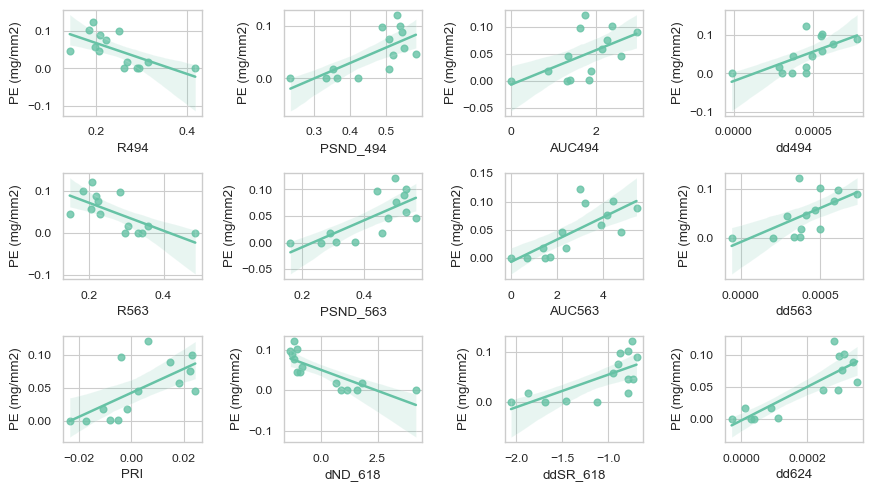

In [172]:
fig, axes = plt.subplots(3,4, figsize=(9,5))
#fig, axes = plt.subplots(4,4, sharex=False, figsize=(12,9))

sns.regplot(x="R494", y="PE (mg/mm2)", data=df_merged, ax=axes[(0,0)], ci=95, seed = 1)
sns.regplot(x="R563", y="PE (mg/mm2)", data=df_merged, ax=axes[(1,0)], ci=95, seed = 1)
sns.regplot(x="PRI", y="PE (mg/mm2)", data=df_merged, ax=axes[(2,0)], ci=95, seed = 1)

sns.regplot(x="PSND_494", y="PE (mg/mm2)", data=df_merged, ax=axes[(0,1)], ci=95, seed = 1)
sns.regplot(x="PSND_563", y="PE (mg/mm2)", data=df_merged, ax=axes[(1,1)], ci=95, seed = 1)
sns.regplot(x="dND_618", y="PE (mg/mm2)", data=df_merged, ax=axes[(2,1)], ci=95, seed = 1)

sns.regplot(x="AUC494", y="PE (mg/mm2)", data=df_merged, ax=axes[(0,2)], ci=95, seed = 1)
sns.regplot(x="AUC563", y="PE (mg/mm2)", data=df_merged, ax=axes[(1,2)], ci=95, seed = 1)
sns.regplot(x="ddSR_618", y="PE (mg/mm2)", data=df_merged, ax=axes[(2,2)], ci=95, seed = 1)

sns.regplot(x="dd494", y="PE (mg/mm2)", data=df_merged, ax=axes[(0,3)], ci=95, seed = 1)
sns.regplot(x="dd563", y="PE (mg/mm2)", data=df_merged, ax=axes[(1,3)], ci=95, seed = 1)
sns.regplot(x="dd624", y="PE (mg/mm2)", data=df_merged, ax=axes[(2,3)], ci=95, seed = 1)

plt.tight_layout()
plt.show()

In [149]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_merged['AUC494'], df_merged['PE (mg/mm2)'])
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_merged['AUC563'], df_merged['PE (mg/mm2)'])
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_merged['AUC624'], df_merged['PE (mg/mm2)'])

In [150]:
r_value**2

0.3077286394635048

In [139]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_merged['dd624'], df_merged['PE (mg/mm2)'])

In [140]:
r_value**2

0.7189268201703756

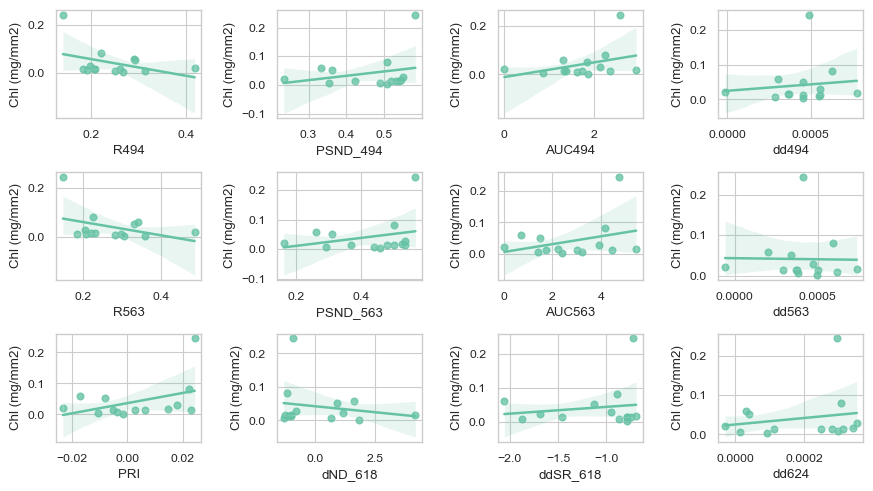

In [19]:
fig, axes = plt.subplots(3,4, figsize=(9,5))
#fig, axes = plt.subplots(4,4, sharex=False, figsize=(12,9))

sns.regplot(x="R494", y="Chl (mg/mm2)", data=df_merged, ax=axes[(0,0)], ci=95, seed = 1)
sns.regplot(x="R563", y="Chl (mg/mm2)", data=df_merged, ax=axes[(1,0)], ci=95, seed = 1)
sns.regplot(x="PRI", y="Chl (mg/mm2)", data=df_merged, ax=axes[(2,0)], ci=95, seed = 1)

sns.regplot(x="PSND_494", y="Chl (mg/mm2)", data=df_merged, ax=axes[(0,1)], ci=95, seed = 1)
sns.regplot(x="PSND_563", y="Chl (mg/mm2)", data=df_merged, ax=axes[(1,1)], ci=95, seed = 1)
sns.regplot(x="dND_618", y="Chl (mg/mm2)", data=df_merged, ax=axes[(2,1)], ci=95, seed = 1)

sns.regplot(x="AUC494", y="Chl (mg/mm2)", data=df_merged, ax=axes[(0,2)], ci=95, seed = 1)
sns.regplot(x="AUC563", y="Chl (mg/mm2)", data=df_merged, ax=axes[(1,2)], ci=95, seed = 1)
sns.regplot(x="ddSR_618", y="Chl (mg/mm2)", data=df_merged, ax=axes[(2,2)], ci=95, seed = 1)

sns.regplot(x="dd494", y="Chl (mg/mm2)", data=df_merged, ax=axes[(0,3)], ci=95, seed = 1)
sns.regplot(x="dd563", y="Chl (mg/mm2)", data=df_merged, ax=axes[(1,3)], ci=95, seed = 1)
sns.regplot(x="dd624", y="Chl (mg/mm2)", data=df_merged, ax=axes[(2,3)], ci=95, seed = 1)

plt.tight_layout()
plt.show()

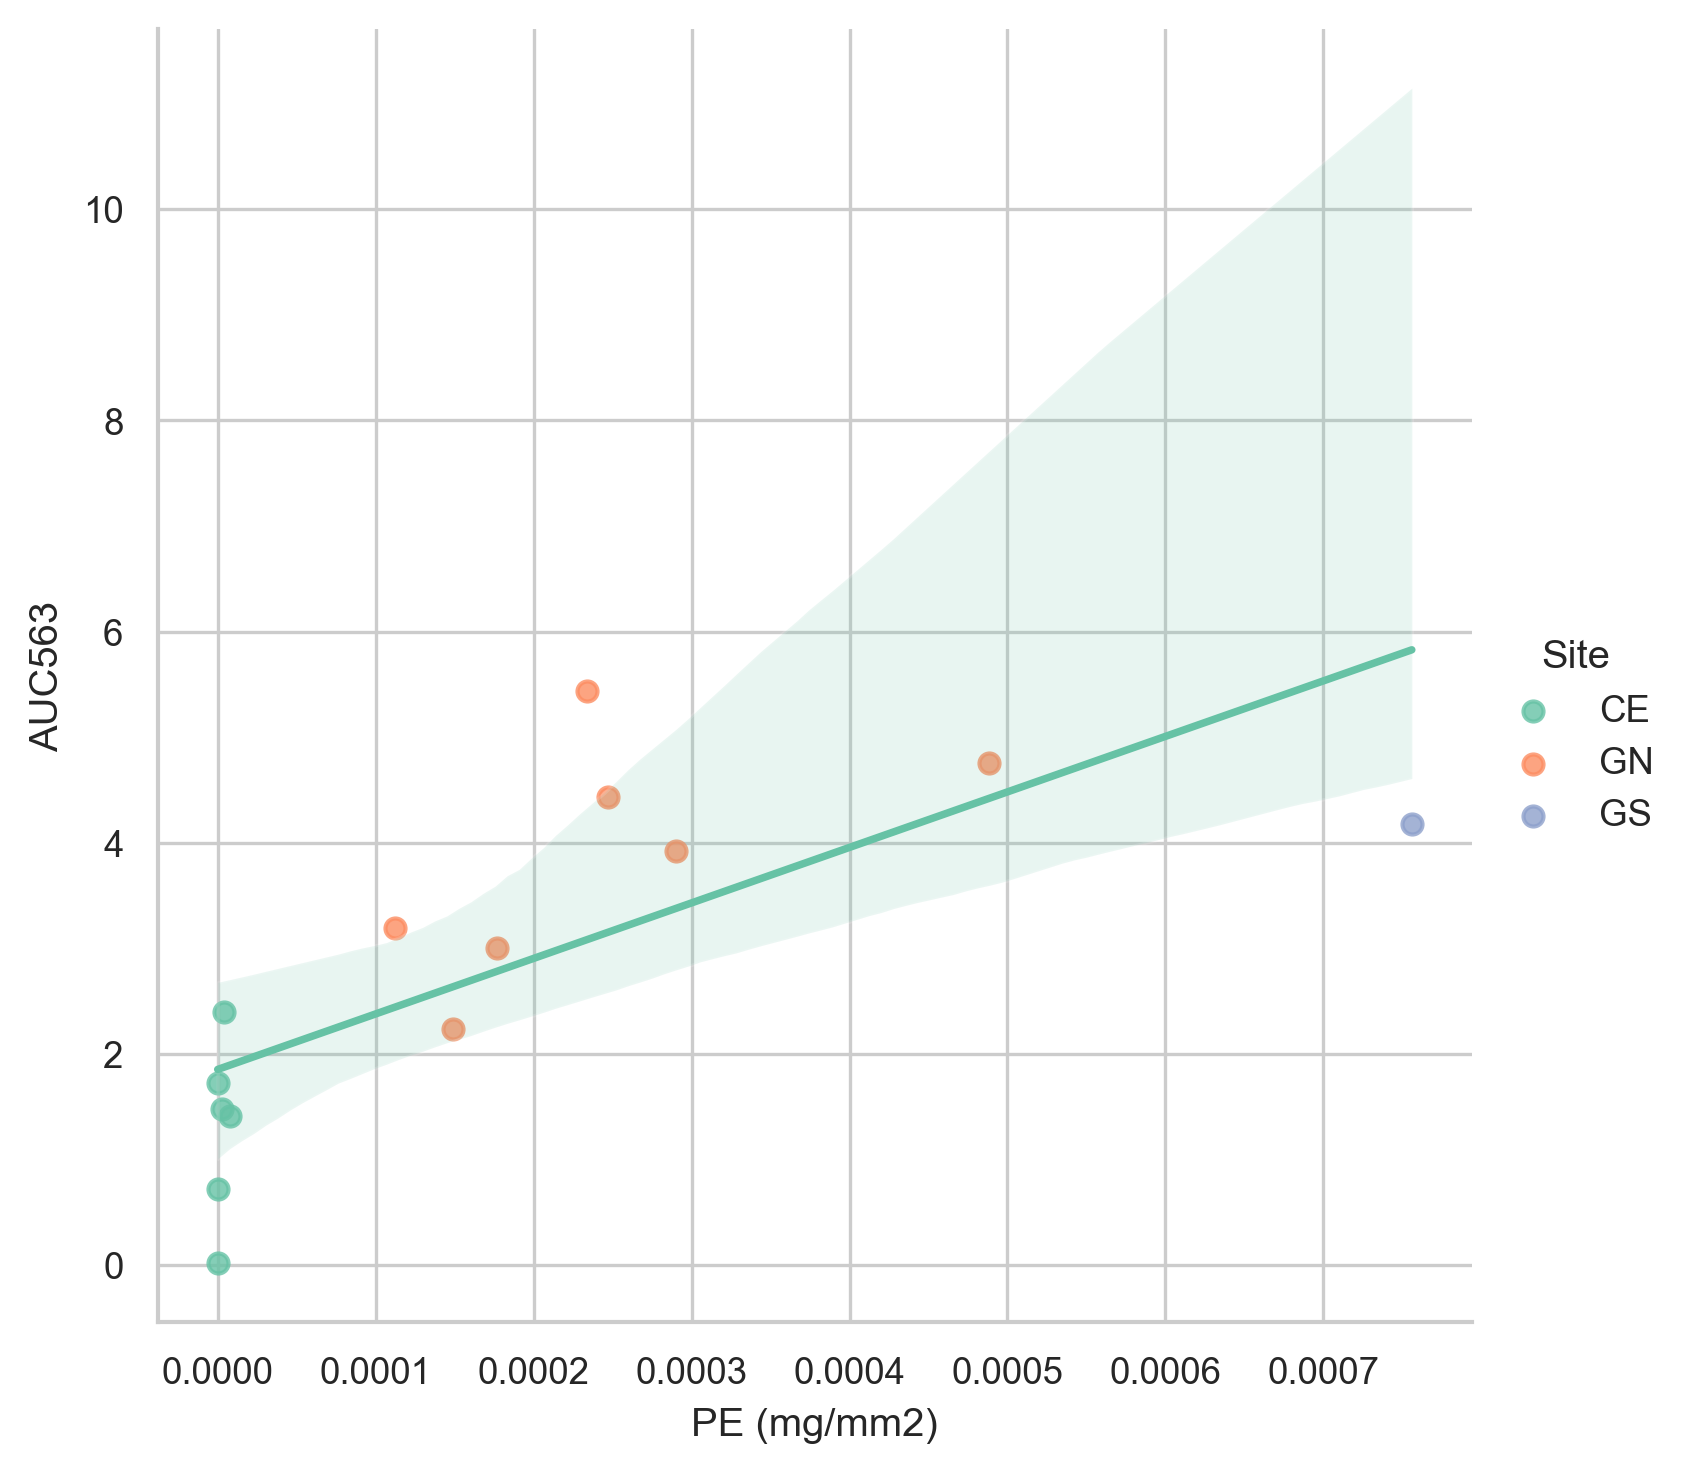

In [42]:
linmodel = sns.lmplot(x="PE (mg/mm2)", y = "AUC563", data=df_merged, ci=95, seed = 1, hue='Site', fit_reg=False)
sns.regplot(x="PE (mg/mm2)", y = "AUC563", data=df_merged, ci=95, seed = 1, scatter=False)
plt.show()

KeyError: 'PSSR_PB494'

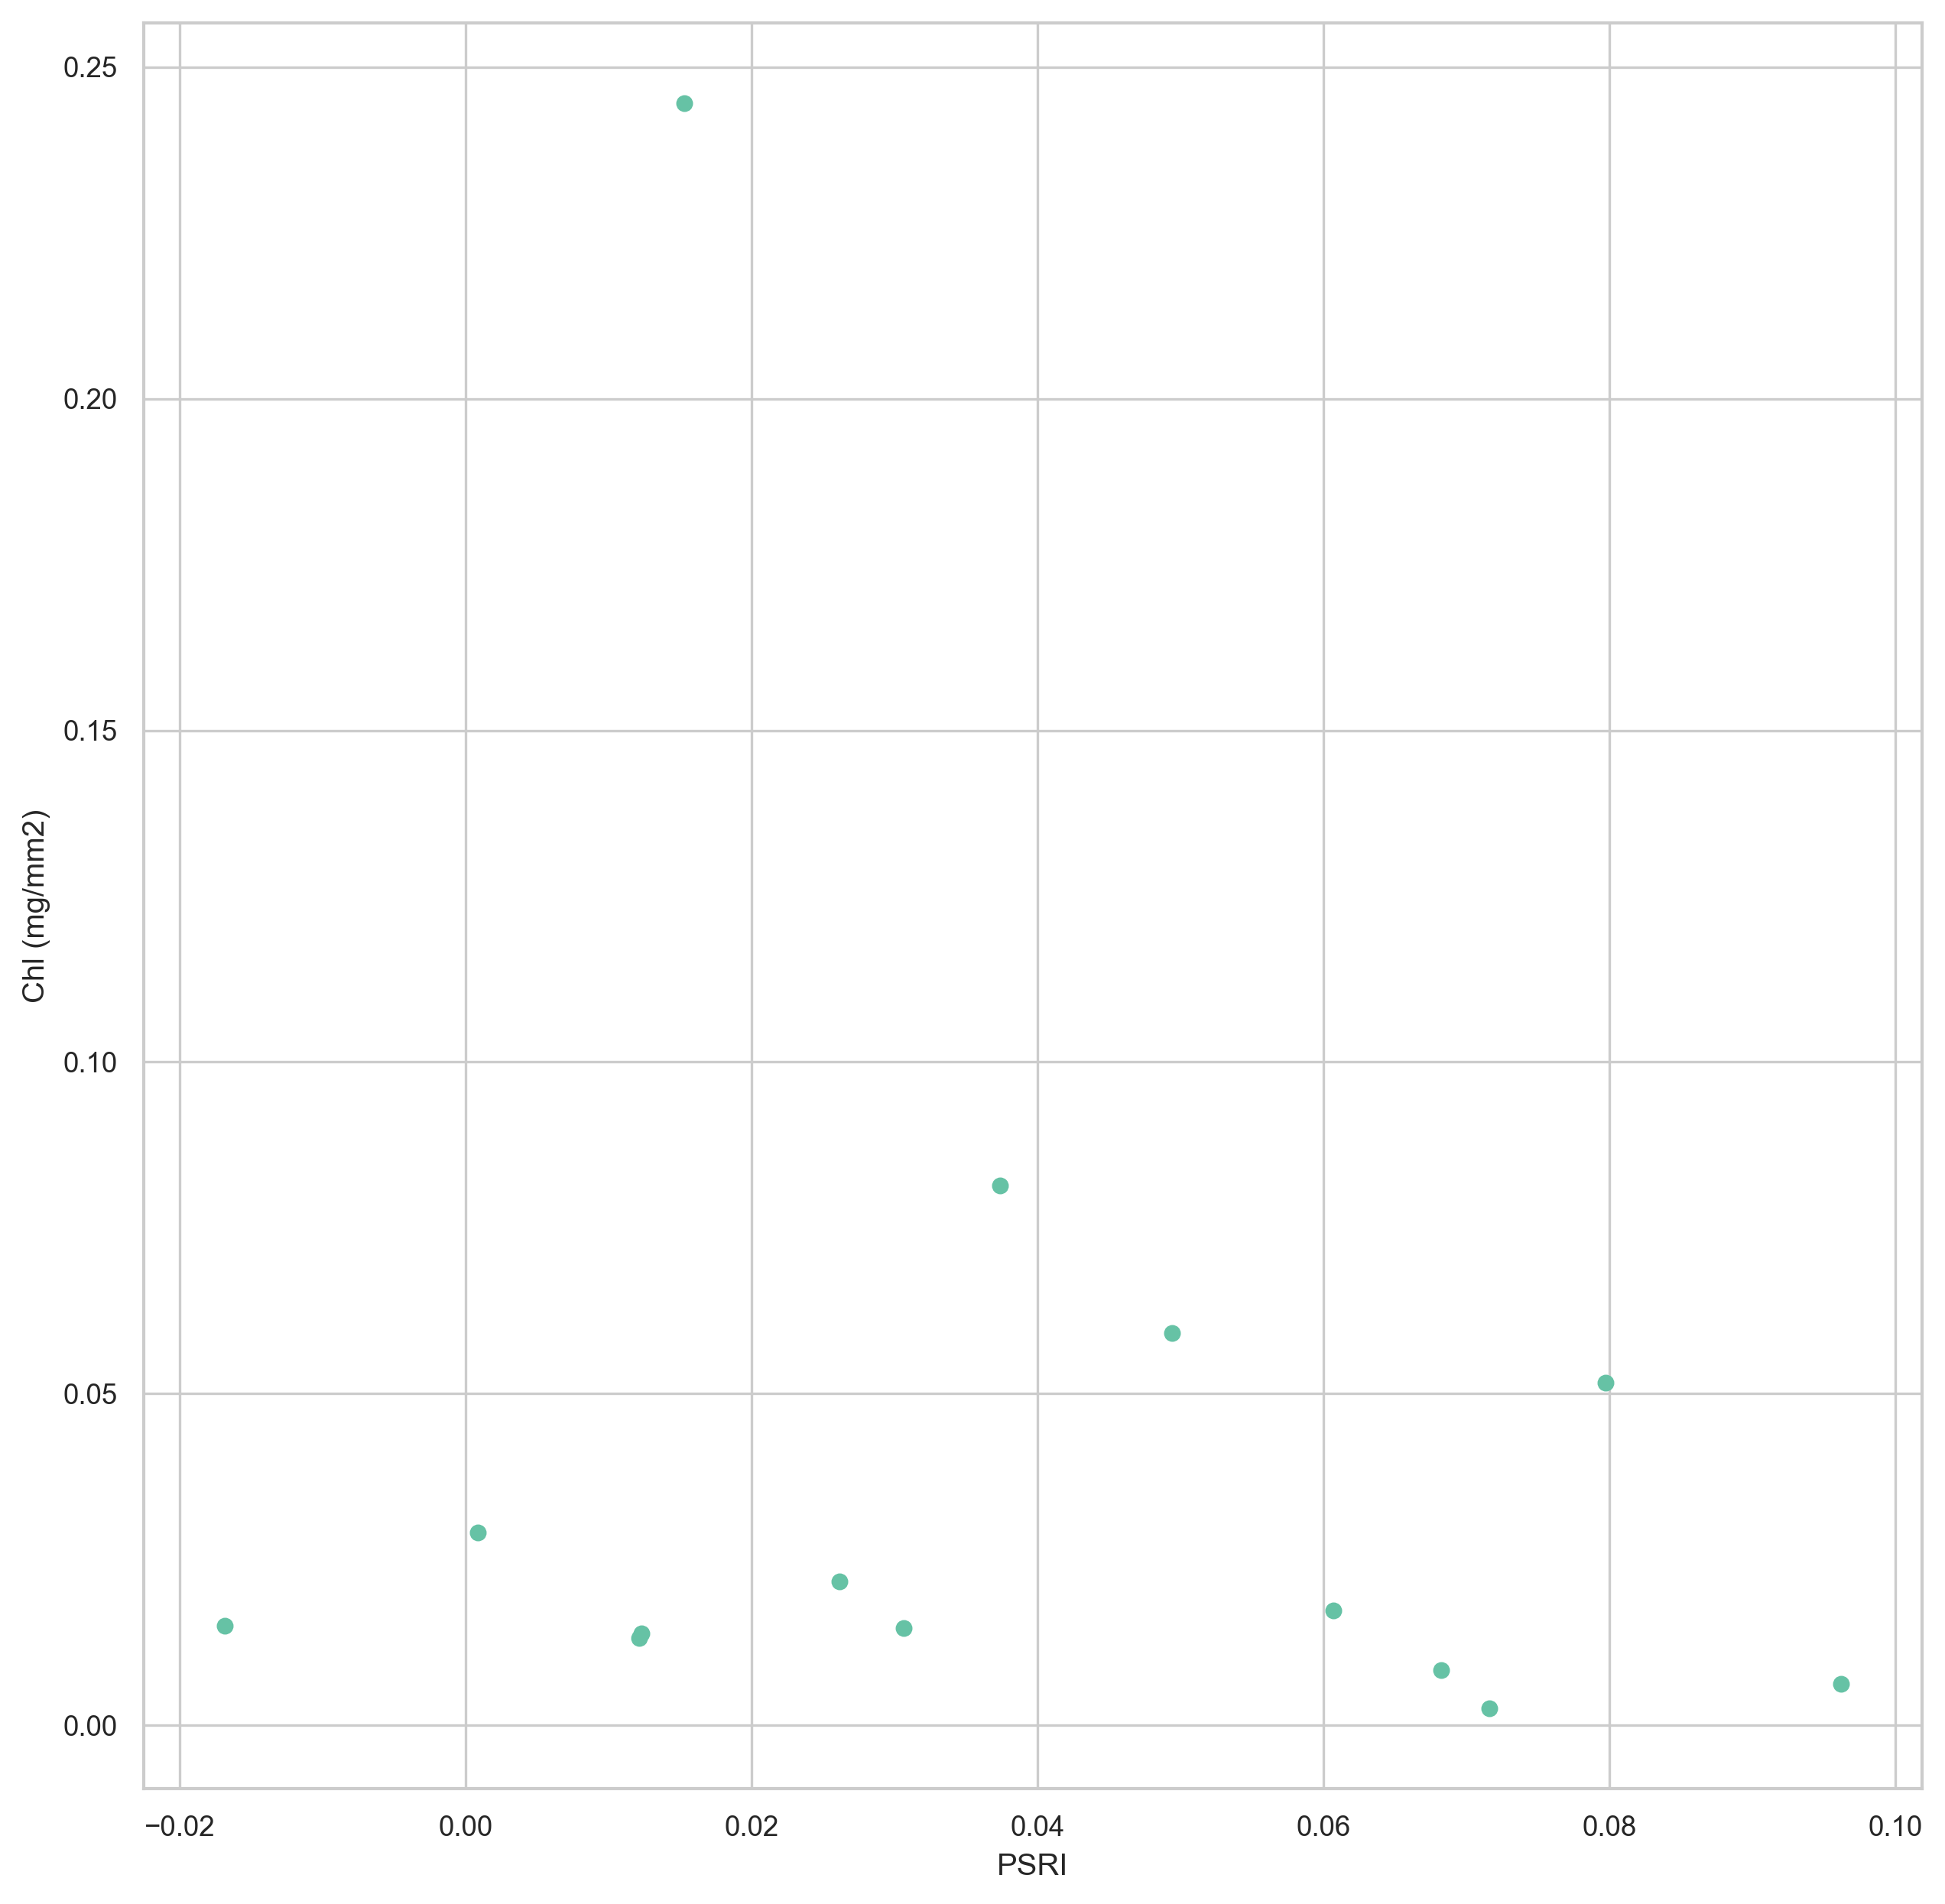

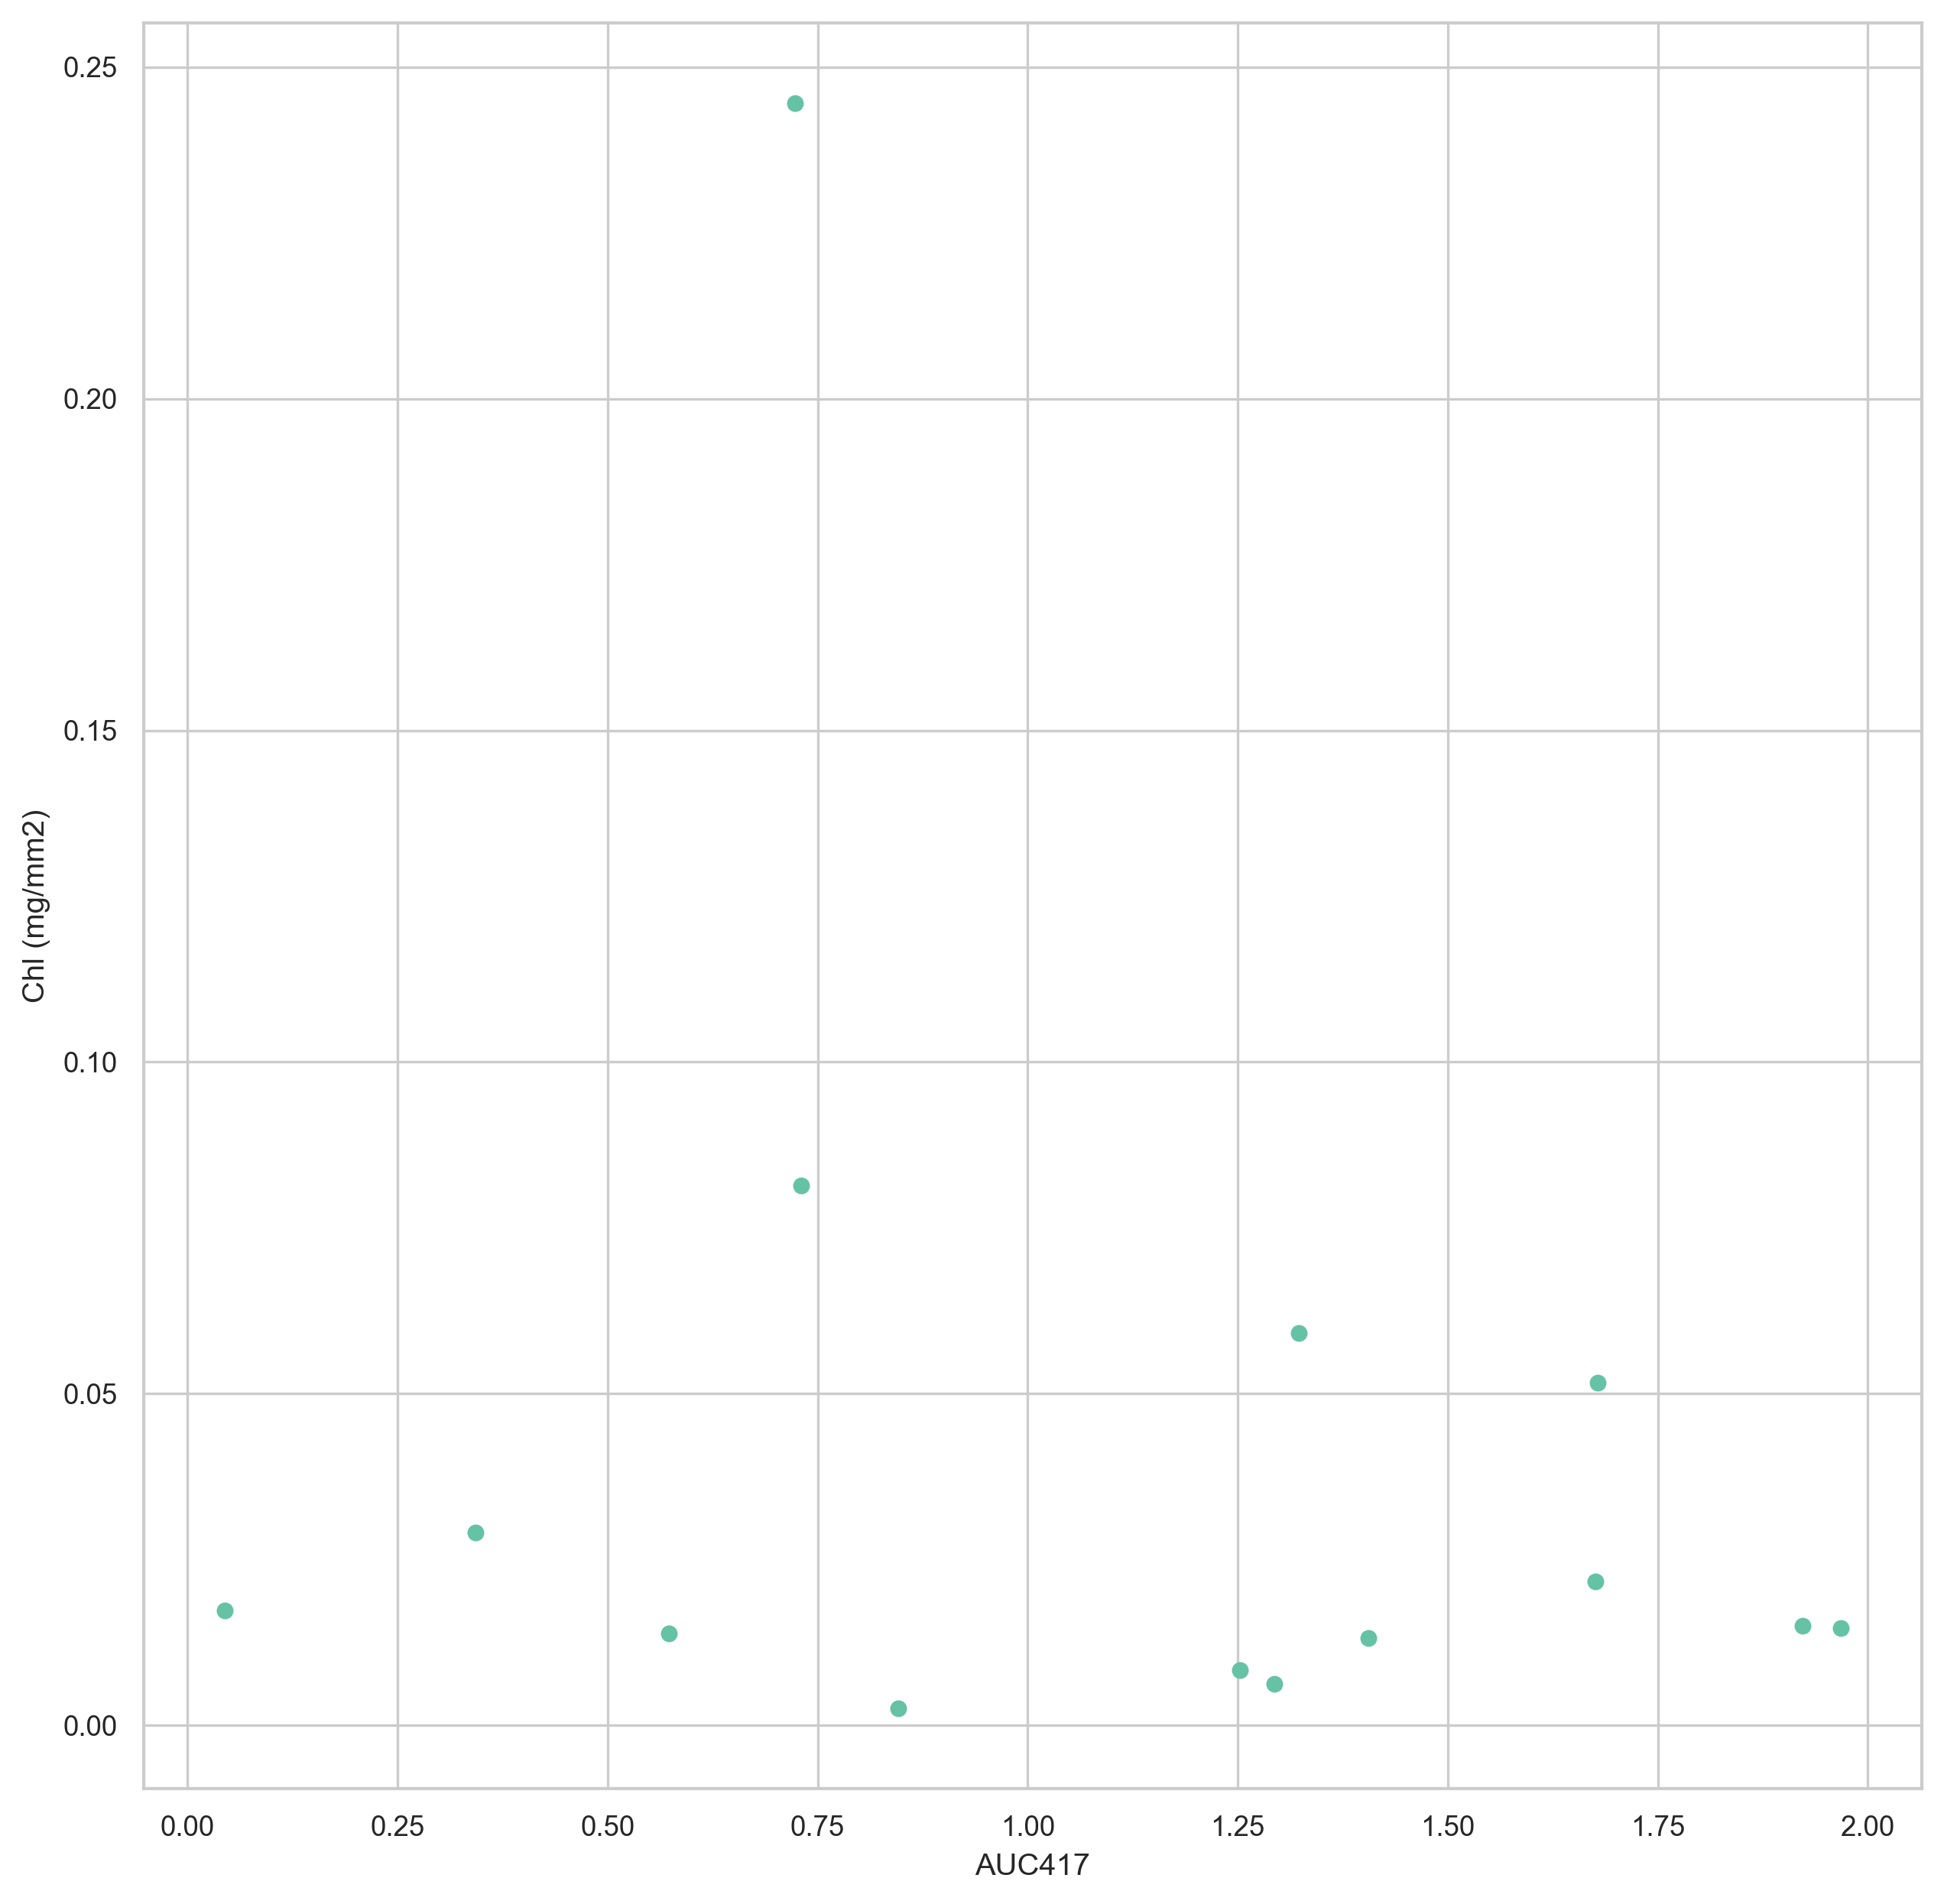

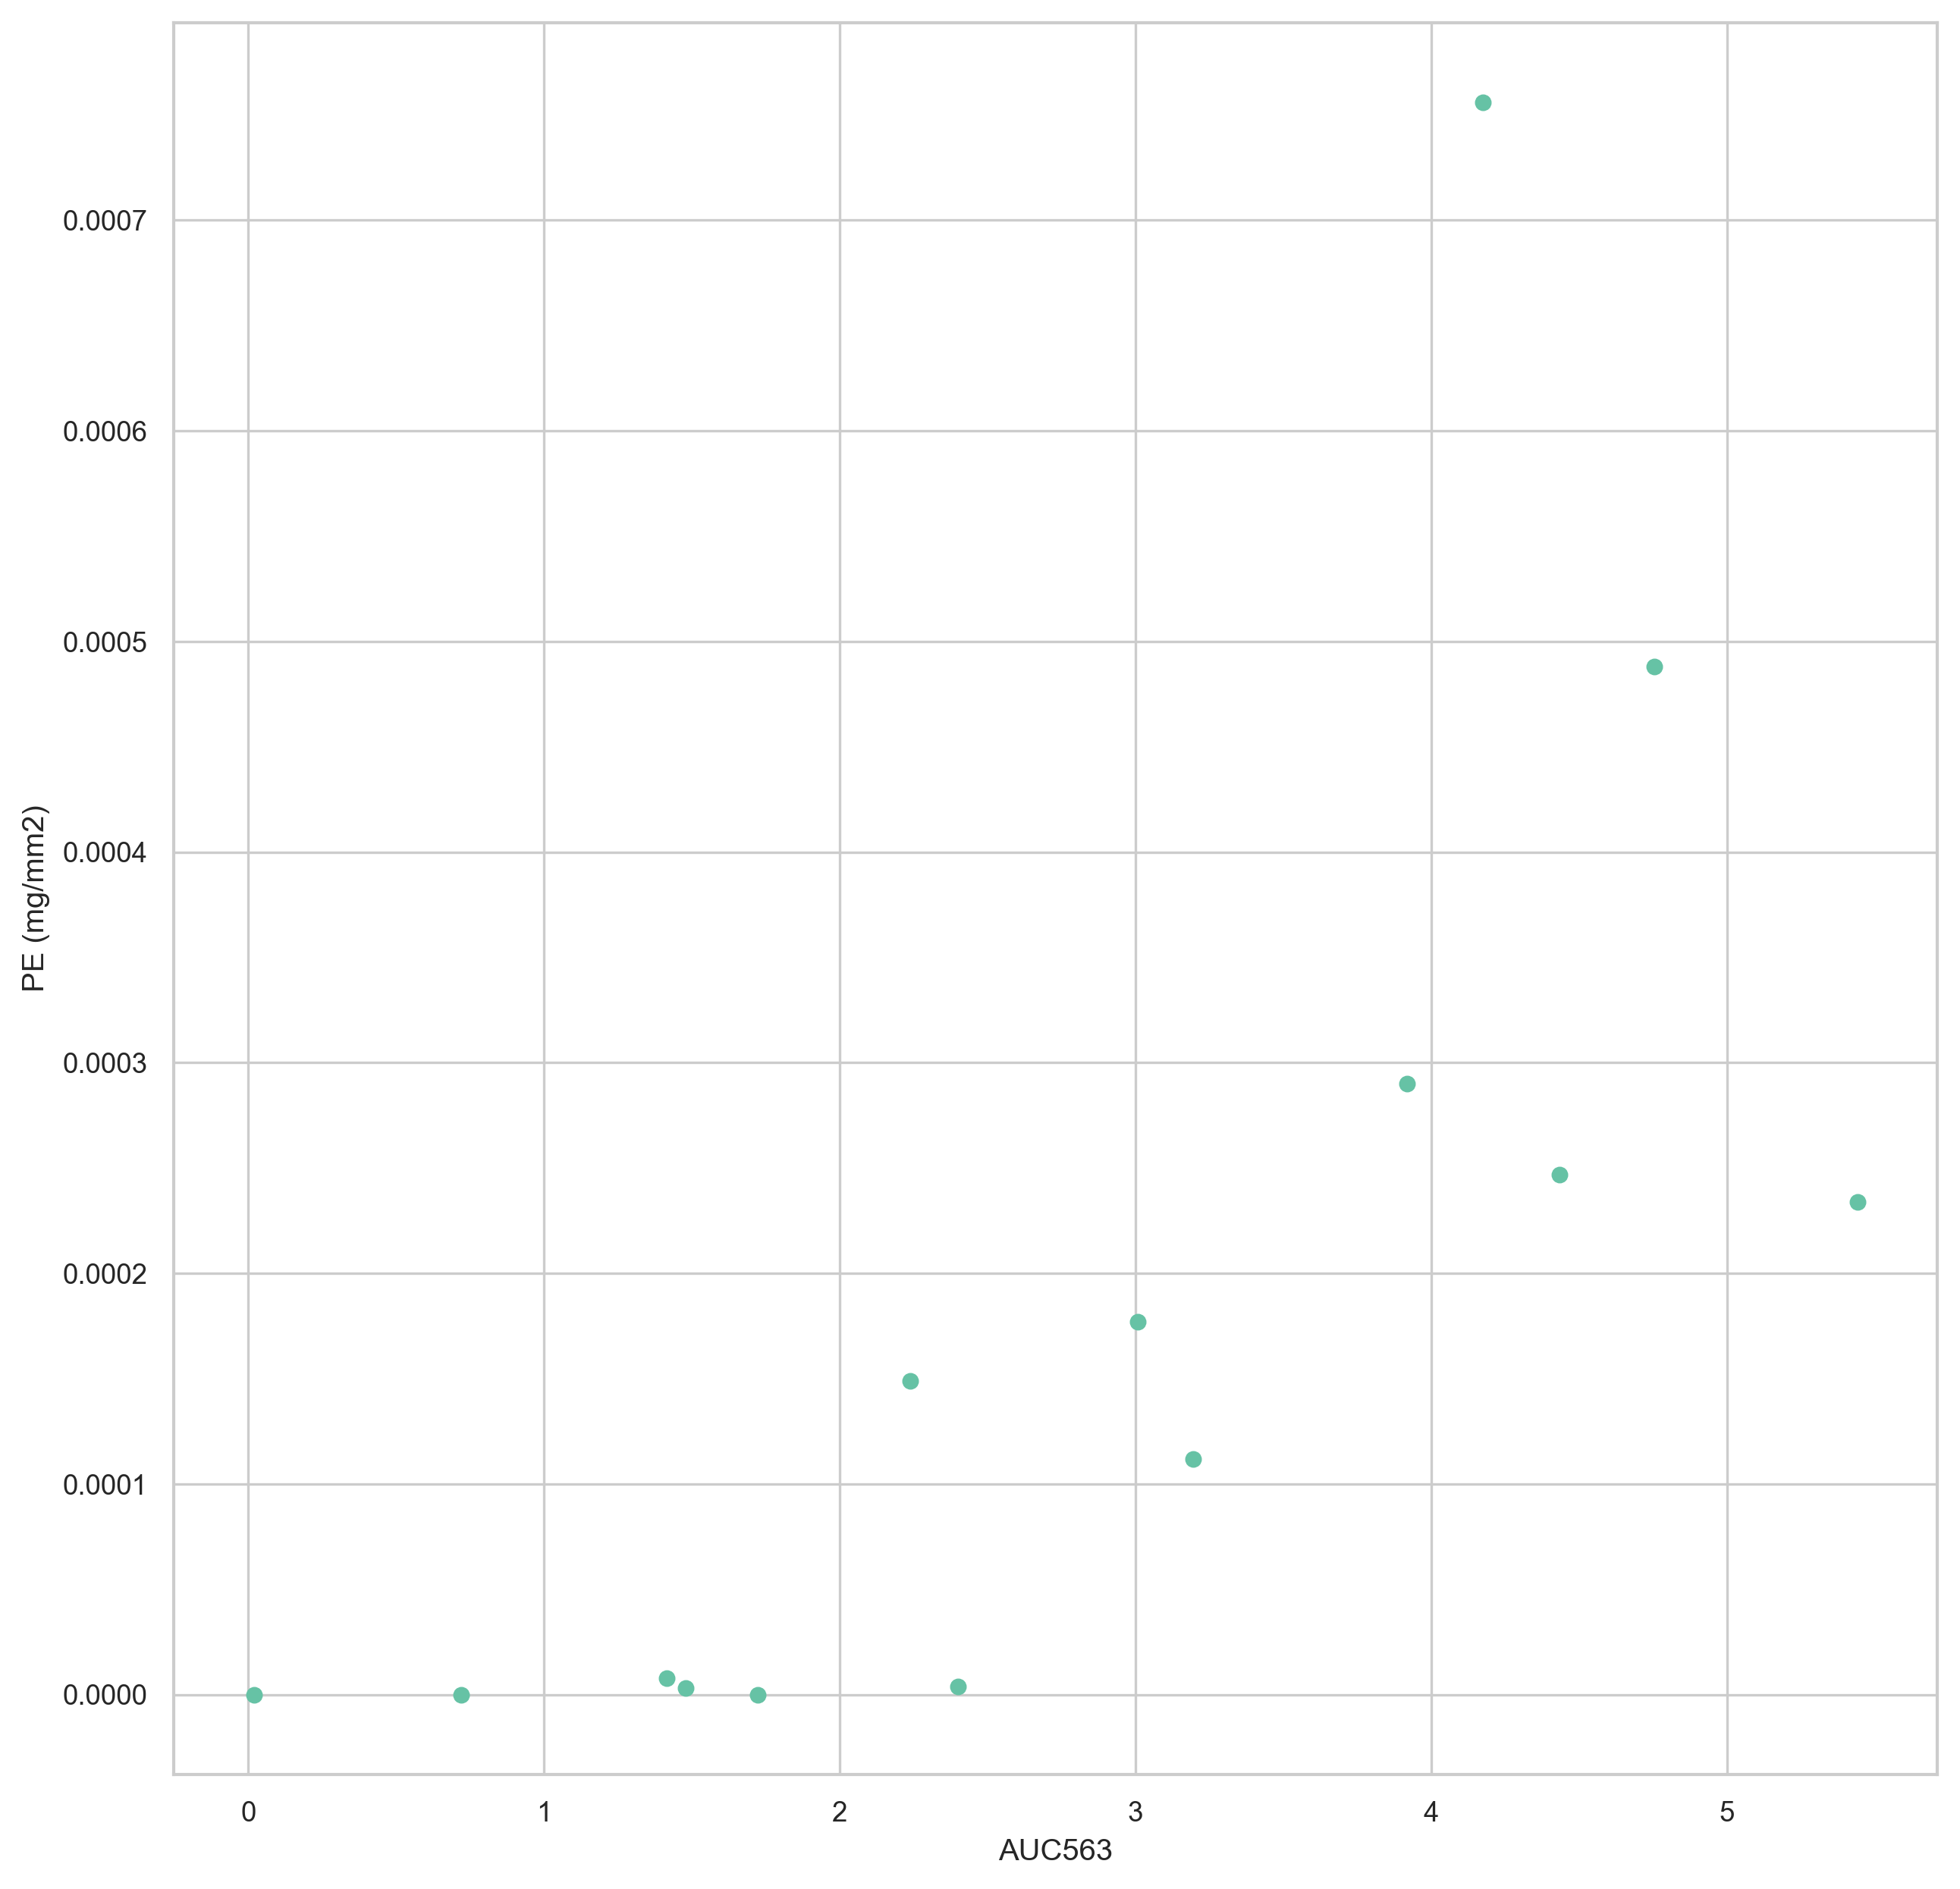

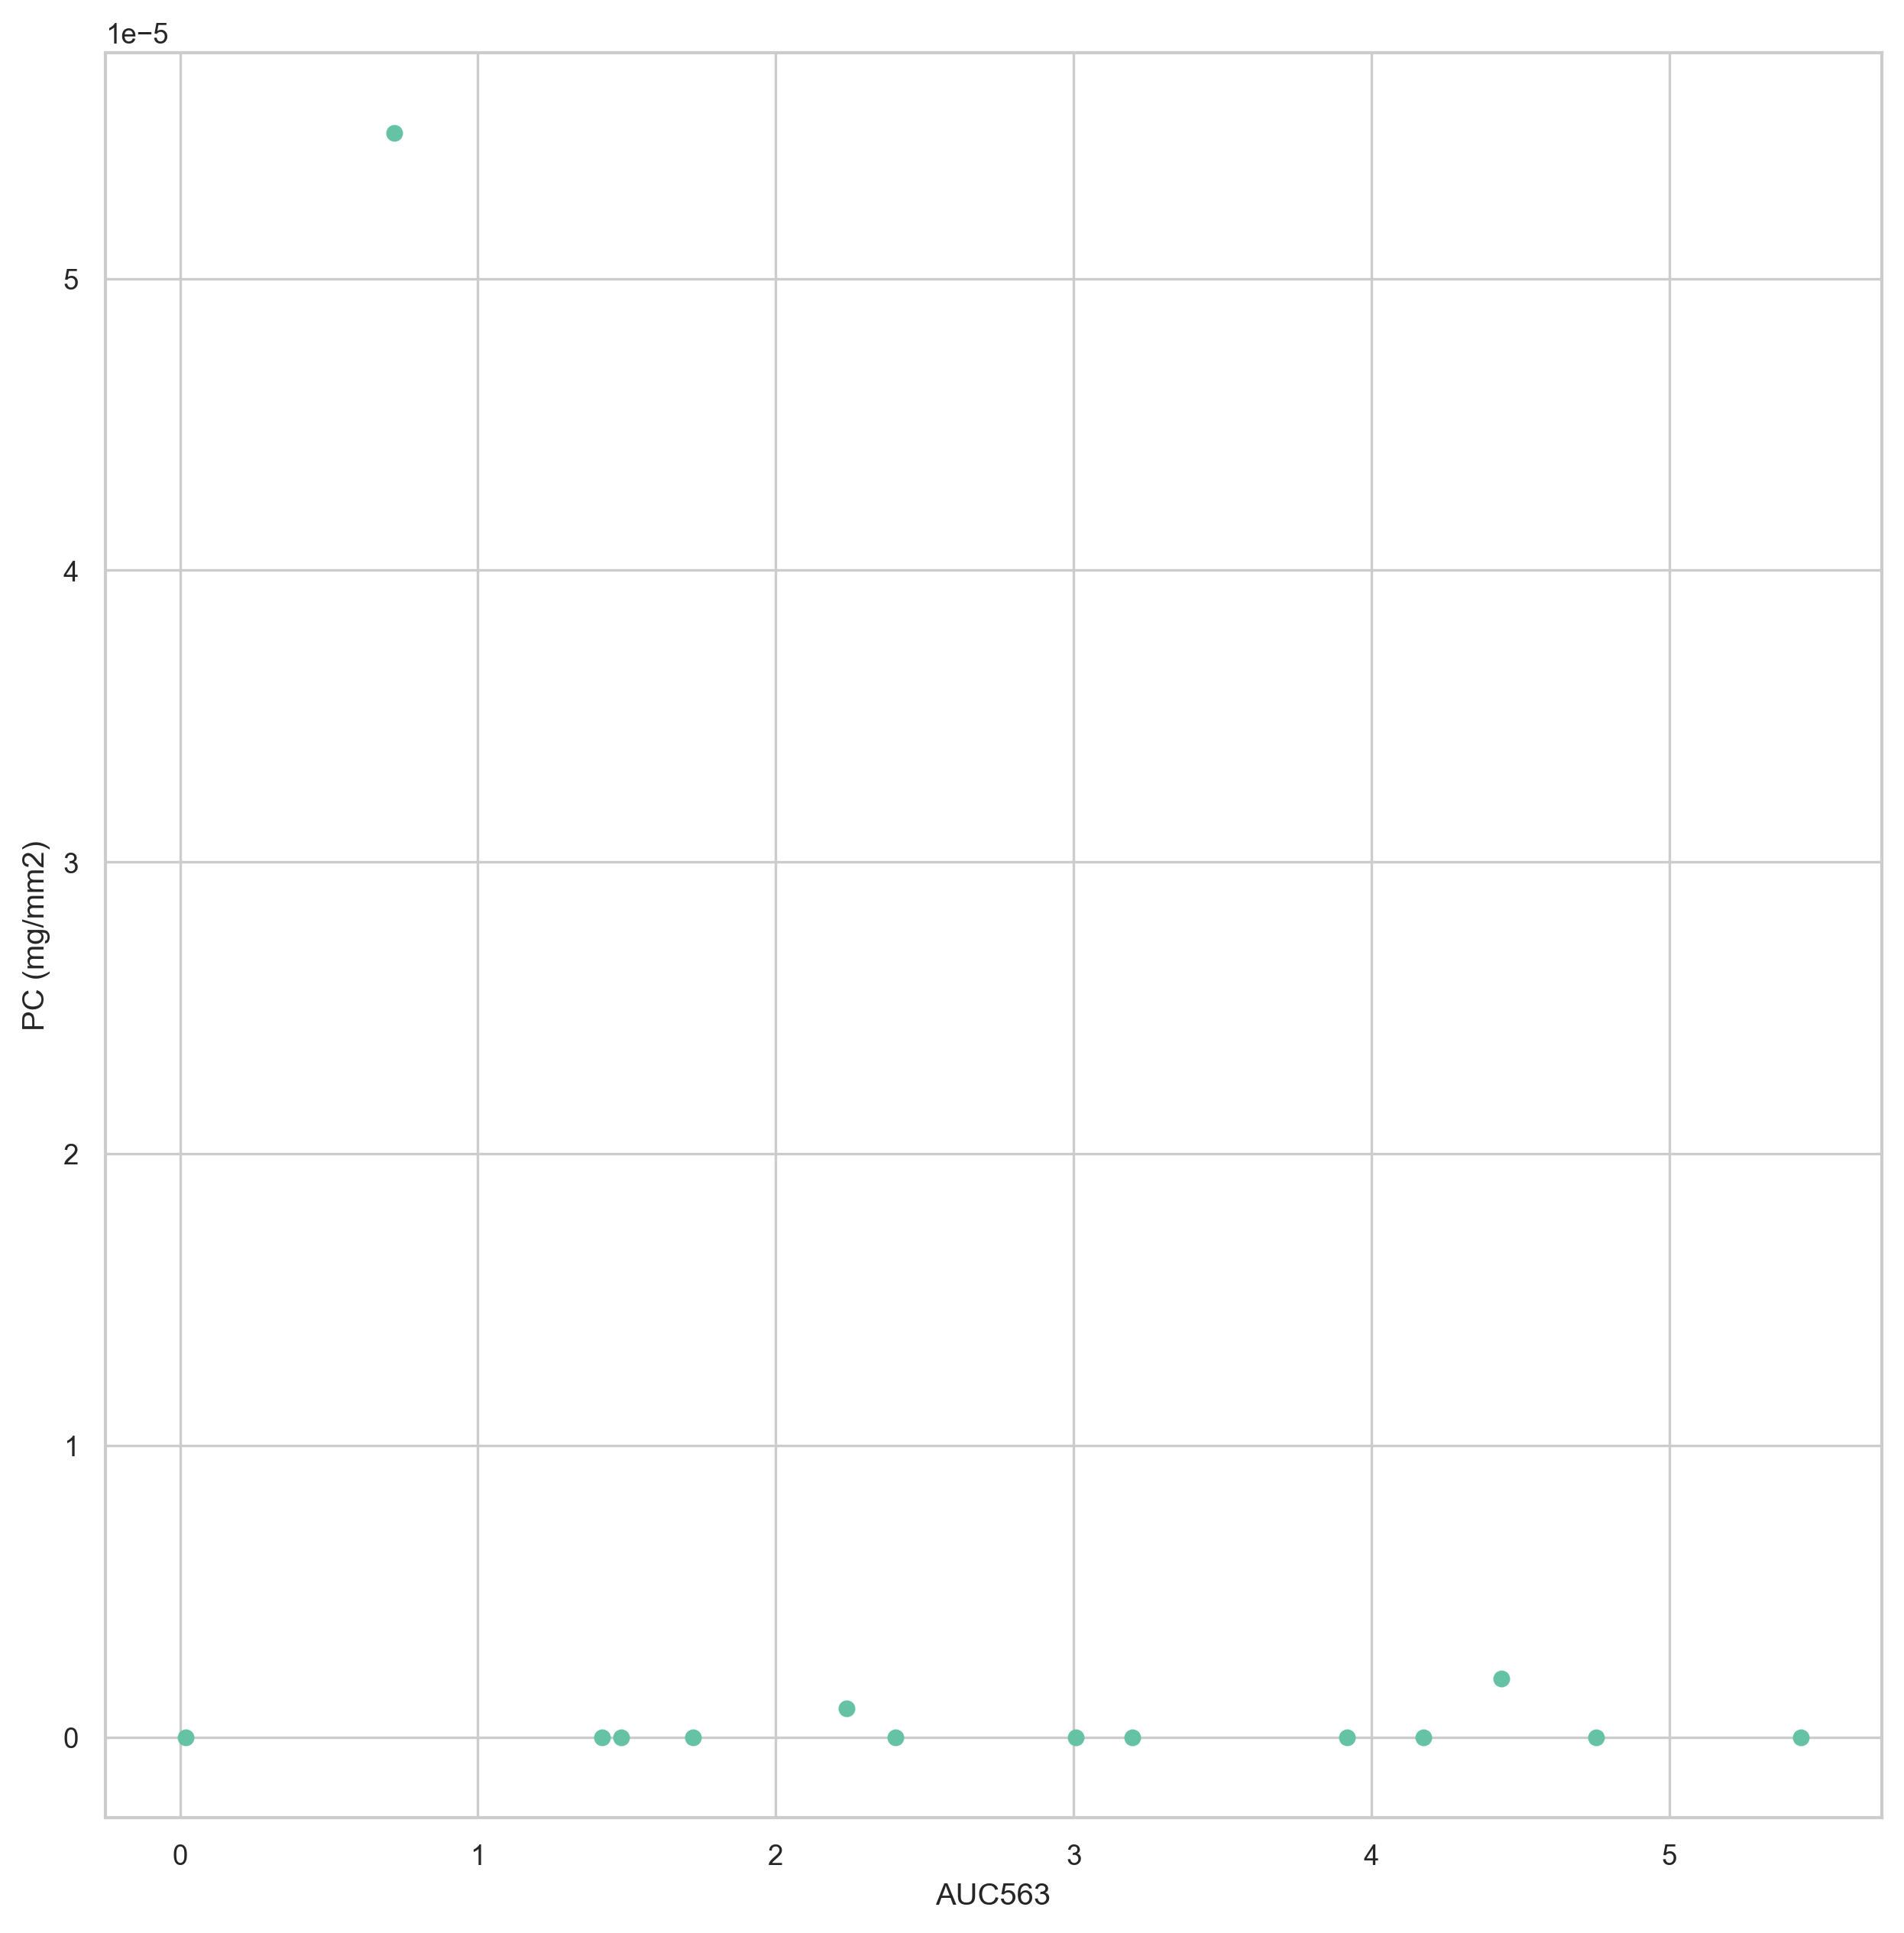

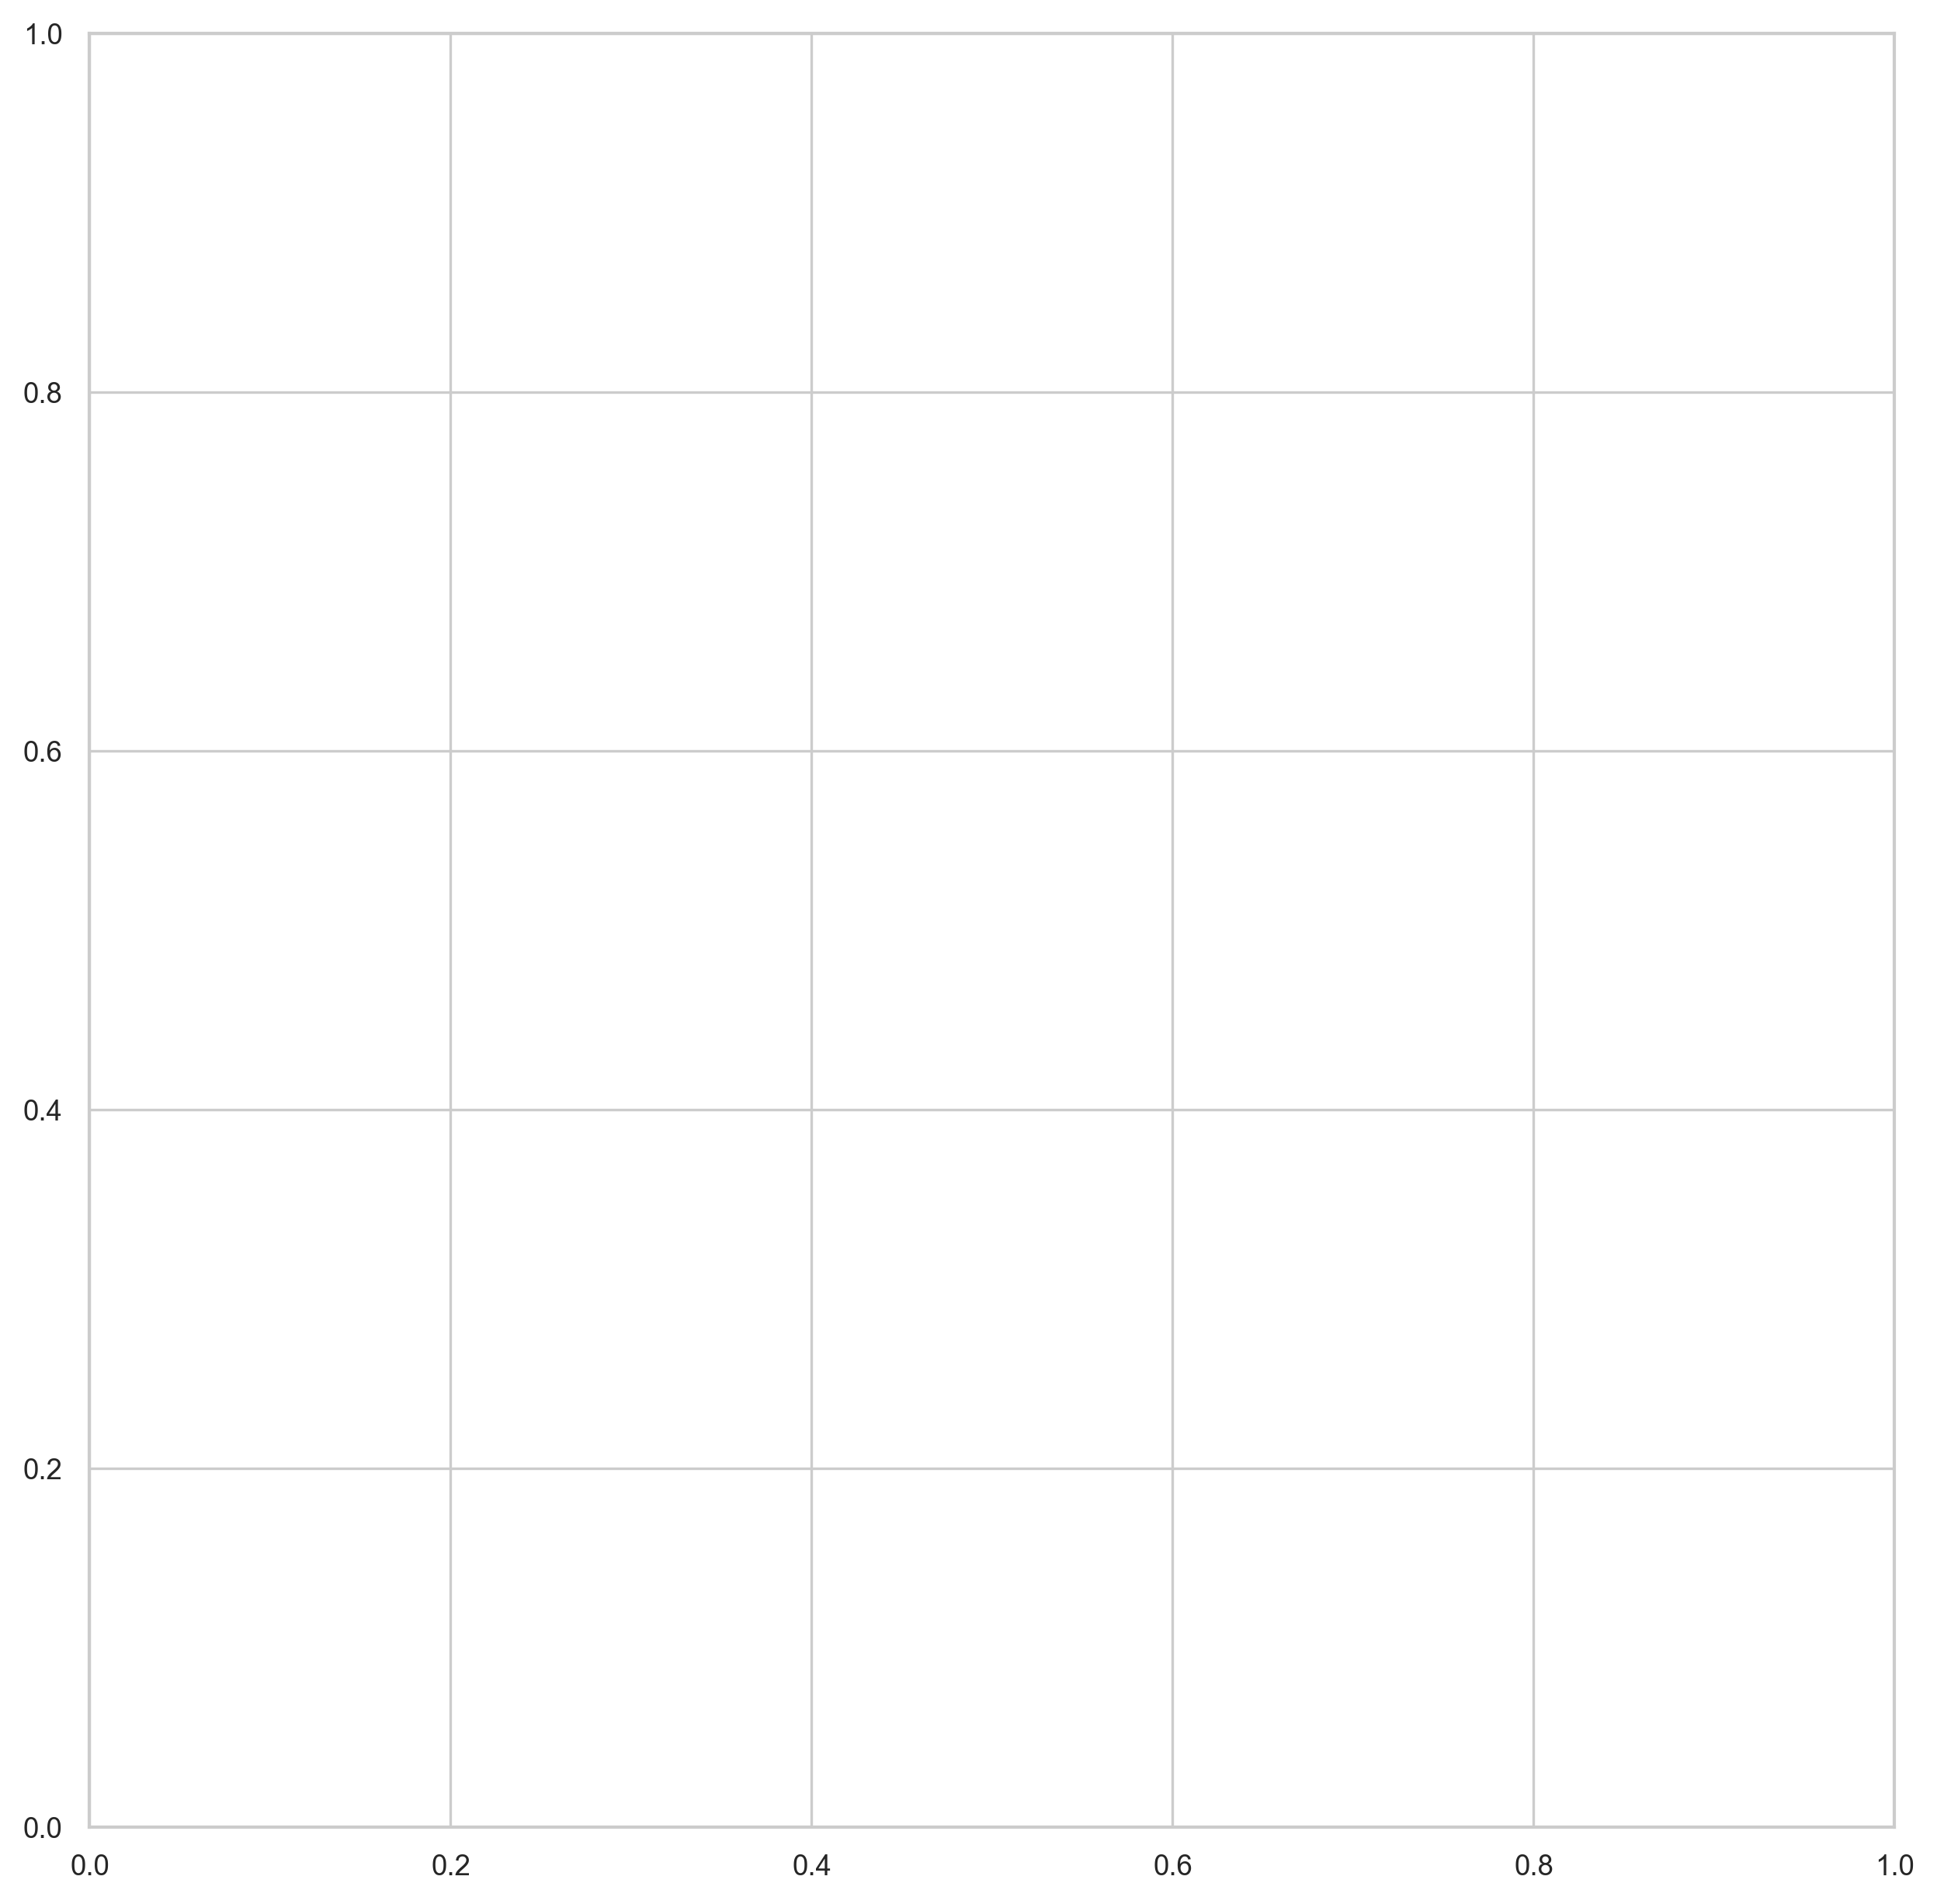

In [43]:
df_merged.plot(x="PSRI", y = "Chl (mg/mm2)", kind="scatter")
df_merged.plot(x="AUC417", y="Chl (mg/mm2)", kind="scatter")
df_merged.plot(x="AUC563", y="PE (mg/mm2)", kind="scatter")
df_merged.plot(x="AUC563", y="PC (mg/mm2)", kind="scatter")
df_merged.plot(x="PSSR_PB494", y="PE (mg/mm2)", kind="scatter")
df_merged.plot(x="PSSR_PB494", y="PC (mg/mm2)", kind="scatter")
df_merged.plot(x="PSND_CHLA", y="PE (mg/mm2)", kind="scatter")
plt.show()